# Vehicle Price Prediction

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # ploting purpose
import seaborn as sns  # visualization purpose

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 

# Machine Learning Algorithms- sklearn imports

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
data = pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/car data.csv")

In [5]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
data.shape

(301, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
for i in data.columns[5:8]:
    print(f'{i}')

Fuel_Type
Seller_Type
Transmission


In [9]:
for i in data.columns[5::]:
    print(i, " = ",data[f"{i}"].unique())
    

Fuel_Type  =  ['Petrol' 'Diesel' 'CNG']
Seller_Type  =  ['Dealer' 'Individual']
Transmission  =  ['Manual' 'Automatic']
Owner  =  [0 1 3]


In [10]:
# checking null values in dataset
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# We have not any null value in our dataset

<AxesSubplot:>

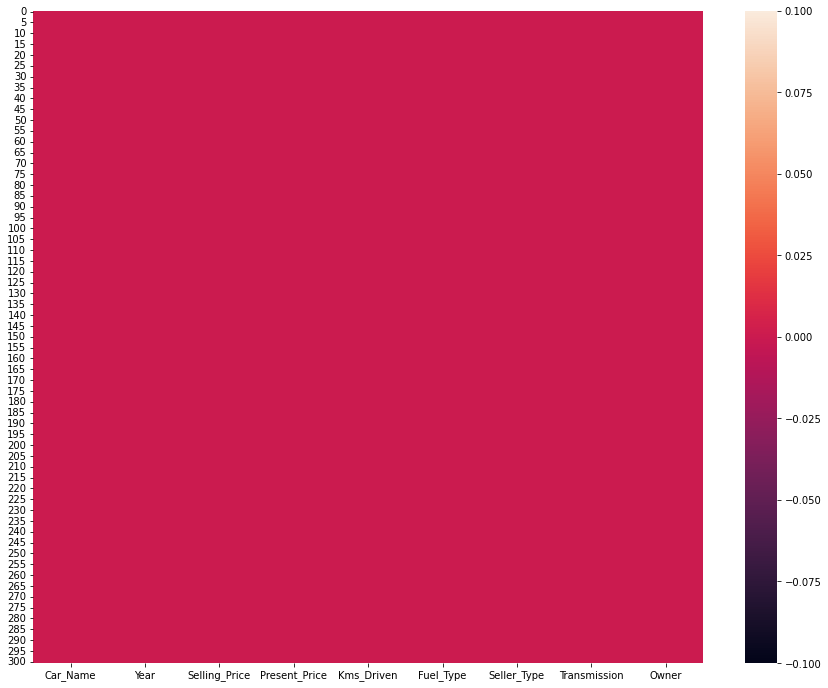

In [11]:
plt.figure(figsize=(15,12))
sns.heatmap(data=data.isnull())

In [12]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
data.iloc[:,0].head()

0       ritz
1        sx4
2       ciaz
3    wagon r
4      swift
Name: Car_Name, dtype: object

In [15]:
# New data after droping car name from dataset
data = data.drop(['Car_Name'], axis=1) 

In [16]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [17]:
data['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007])

In [18]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Year', ylabel='count'>

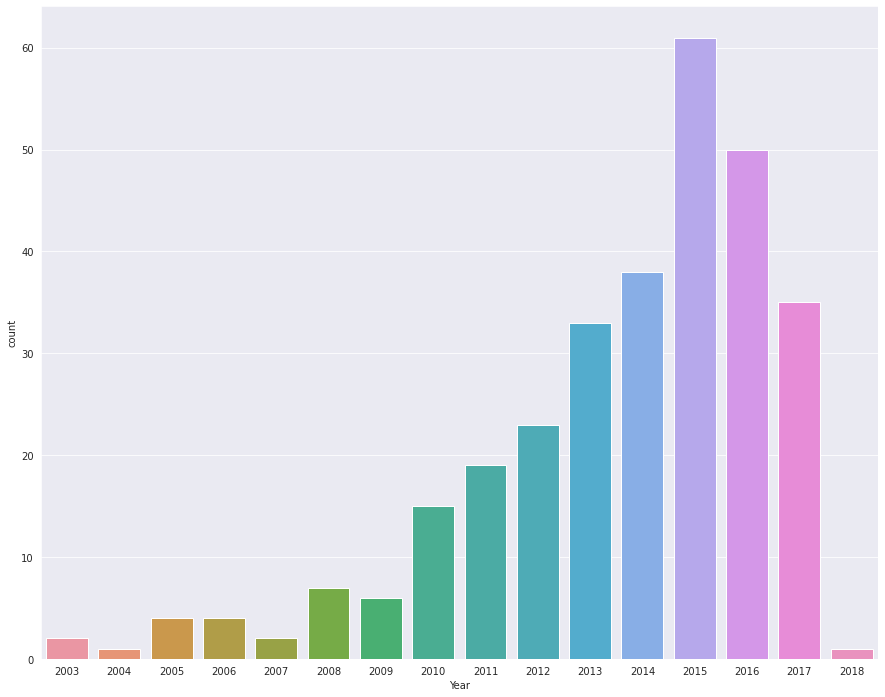

In [19]:
plt.figure(figsize=(15,12))

sns.countplot(data=data, x='Year')

<AxesSubplot:xlabel='Year', ylabel='count'>

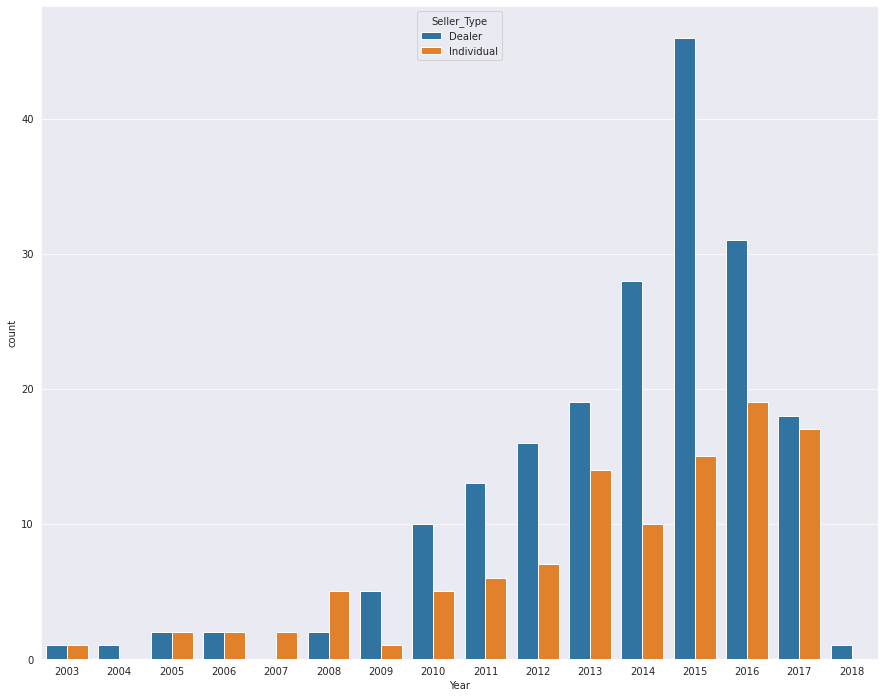

In [20]:
plt.figure(figsize=(15,12))

sns.countplot(data=data, x='Year',hue='Seller_Type', )

<AxesSubplot:xlabel='Year', ylabel='count'>

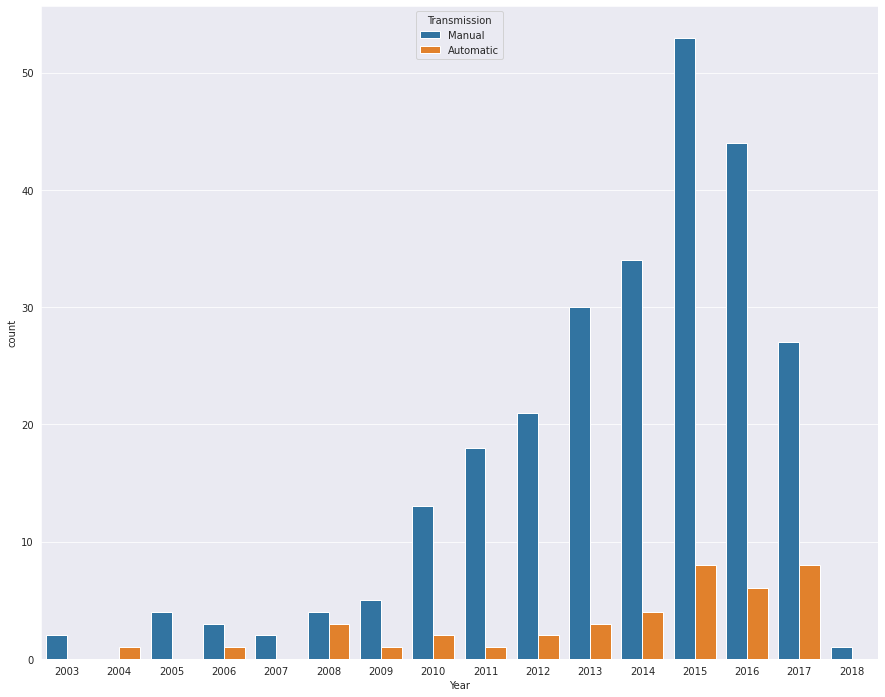

In [21]:
plt.figure(figsize=(15,12))
sns.countplot(data=data, x='Year',hue='Transmission', )

In [22]:
data['Current_Year']=2023

In [23]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


In [24]:
data['Number of Years']=data['Current_Year']-data['Year']

In [25]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Number of Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [26]:
# New  updated data after droping columns ['year' and 'current_year']
data= data.drop(['Year', 'Current_Year'], axis=1)

In [27]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number of Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [28]:
# after converting categorical data into numerical code
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number of Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [29]:
# co-relation in data
data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number of Years
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104
Number of Years,-0.236141,0.047584,0.524342,0.182104,1.000000


<AxesSubplot:>

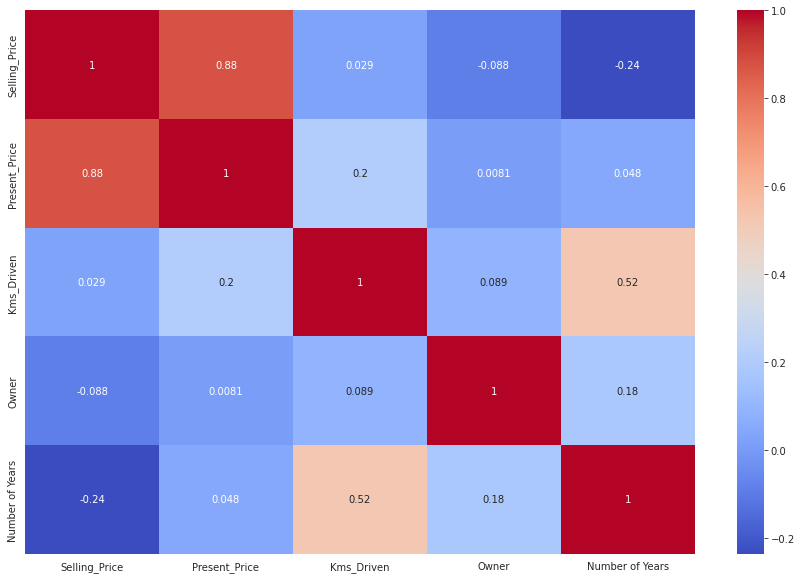

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [31]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number of Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [32]:
# setting dependent and independent columns in data 
# "Selling_Price" drop and whole columns taking as input
x = data.drop('Selling_Price', axis=1)
data['Selling_Price']

# only "Sellin_Price" column taking as output  column
y = data['Selling_Price']

In [33]:
x.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number of Years
0,5.59,27000,Petrol,Dealer,Manual,0,9
1,9.54,43000,Diesel,Dealer,Manual,0,10
2,9.85,6900,Petrol,Dealer,Manual,0,6
3,4.15,5200,Petrol,Dealer,Manual,0,12
4,6.87,42450,Diesel,Dealer,Manual,0,9


In [34]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [35]:
# Train_test_split 

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [36]:
x_train.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number of Years
144,0.99,25000,Petrol,Individual,Manual,0,9
158,0.54,8600,Petrol,Individual,Manual,0,6
177,0.57,24000,Petrol,Individual,Automatic,0,7
8,8.89,20273,Diesel,Dealer,Manual,0,7
50,30.61,104707,Diesel,Dealer,Automatic,0,11


In [37]:
y_train.head()

144     0.60
158     0.48
177     0.35
8       8.75
50     14.90
Name: Selling_Price, dtype: float64

In [38]:
x_train.describe(include='O')

,Fuel_Type,Seller_Type,Transmission
count,240,240,240
unique,3,2,2
top,Petrol,Dealer,Manual
freq,190,160,209


In [39]:
onehot_cols = x_train.describe(include='O').columns
onehot_cols

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

# One Hot Encoding for categorical columns

In [40]:
ohe = OneHotEncoder(drop='first')
x_train_ohe = ohe.fit_transform(x_train[onehot_cols]).toarray()
x_test_ohe = ohe.transform(x_test[onehot_cols]).toarray()

x_train_ohe_df = pd.DataFrame(x_train_ohe, columns=ohe.get_feature_names(onehot_cols))
x_test_ohe_df = pd.DataFrame(x_test_ohe, columns=ohe.get_feature_names(onehot_cols))

x_train_ohe_df.head()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0.0,1.0,1.0,1.0
1,0.0,1.0,1.0,1.0
2,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0


# Standard scaling on numerical columns 

In [41]:
num_cols= x_train.describe().columns
num_cols

Index(['Present_Price', 'Kms_Driven', 'Owner', 'Number of Years'], dtype='object')

In [42]:
std_scaler = StandardScaler()
x_train_std = std_scaler.fit_transform(x_train[num_cols])
x_test_std = std_scaler.transform(x_test[num_cols])

x_train_std_df = pd.DataFrame(x_train_std, columns=num_cols)
x_test_std_df = pd.DataFrame(x_test_std, columns=num_cols)

x_train_std_df 

,Present_Price,Kms_Driven,Owner,Number of Years
0,-0.917874,-0.302730,-0.197386,-0.139488
1,-0.981223,-0.701475,-0.197386,-1.185646
2,-0.977000,-0.327044,-0.197386,-0.836926
3,0.194260,-0.417661,-0.197386,-0.836926
4,3.251923,1.635243,-0.197386,0.557951
...,...,...,...,...
235,-0.433603,-0.334119,-0.197386,0.557951
236,-0.923505,-0.506965,-0.197386,-0.488207
237,-0.943214,0.110603,-0.197386,-0.139488
238,-0.850301,-0.278417,-0.197386,-0.488207


In [43]:
# before standard scaling
x_train[num_cols].describe()

,Present_Price,Kms_Driven,Owner,Number of Years
count,240.000000,240.00000,240.000000,240.000000
mean,7.510083,37451.01250,0.037500,9.400000
std,7.118309,41215.01059,0.190381,2.873628
min,0.320000,500.00000,0.000000,5.000000
25%,1.452500,15000.75000,0.000000,7.000000
50%,6.775000,33224.00000,0.000000,9.000000
75%,9.900000,48250.00000,0.000000,11.000000
max,35.960000,500000.00000,1.000000,20.000000


In [44]:
# after Standard Scaling --. mean = 0 and standard_deviation =1
round(x_train_std_df.describe(),2)

,Present_Price,Kms_Driven,Owner,Number of Years
count,240.00,240.00,240.00,240.00
mean,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.01,-0.90,-0.20,-1.53
25%,-0.85,-0.55,-0.20,-0.84
50%,-0.10,-0.10,-0.20,-0.14
75%,0.34,0.26,-0.20,0.56
max,4.01,11.25,5.07,3.70


# Min Max Scaling

In [45]:
mm_scaler = MinMaxScaler()
x_train_mm = mm_scaler.fit_transform(x_train[num_cols])
x_test_mm = mm_scaler.transform(x_test[num_cols])

x_train_mm_df = pd.DataFrame(x_train_mm, columns=num_cols)
x_test_mm_df = pd.DataFrame(x_test_mm, columns=num_cols)

x_train_mm_df 

,Present_Price,Kms_Driven,Owner,Number of Years
0,0.018799,0.049049,0.0,0.266667
1,0.006173,0.016216,0.0,0.066667
2,0.007015,0.047047,0.0,0.133333
3,0.240460,0.039586,0.0,0.133333
4,0.849888,0.208623,0.0,0.400000
...,...,...,...,...
235,0.115320,0.046464,0.0,0.400000
236,0.017677,0.032232,0.0,0.200000
237,0.013749,0.083083,0.0,0.266667
238,0.032267,0.051051,0.0,0.200000


In [46]:
# after minmax scaler  --> min=0 and max=1
x_train_mm_df.describe()

,Present_Price,Kms_Driven,Owner,Number of Years
count,240.000000,240.000000,240.000000,240.000000
mean,0.201742,0.073976,0.037500,0.293333
std,0.199728,0.082513,0.190381,0.191575
min,0.000000,0.000000,0.000000,0.000000
25%,0.031776,0.029031,0.000000,0.133333
50%,0.181117,0.065514,0.000000,0.266667
75%,0.268799,0.095596,0.000000,0.400000
max,1.000000,1.000000,1.000000,1.000000


# Concat encoded and scaled data columns

In [47]:
# enocded and standard scaled data
x_train_ohe_std = pd.concat([x_train_ohe_df, x_train_std_df], axis=1)
x_test_ohe_std = pd.concat([x_test_ohe_df, x_test_std_df], axis=1)

x_train_ohe_std.head()

,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Present_Price,Kms_Driven,Owner,Number of Years
0,0.0,1.0,1.0,1.0,-0.917874,-0.302730,-0.197386,-0.139488
1,0.0,1.0,1.0,1.0,-0.981223,-0.701475,-0.197386,-1.185646
2,0.0,1.0,1.0,0.0,-0.977000,-0.327044,-0.197386,-0.836926
3,1.0,0.0,0.0,1.0,0.194260,-0.417661,-0.197386,-0.836926
4,1.0,0.0,0.0,0.0,3.251923,1.635243,-0.197386,0.557951


In [48]:
x_train_ohe_std.isnull().sum()

Fuel_Type_Diesel          0
Fuel_Type_Petrol          0
Seller_Type_Individual    0
Transmission_Manual       0
Present_Price             0
Kms_Driven                0
Owner                     0
Number of Years           0
dtype: int64

In [49]:
# encoded and minmax scaled data
x_train_ohe_mm = pd.concat([x_train_ohe_df, x_train_mm_df], axis=1)
x_test_ohe_mm = pd.concat([x_test_ohe_df, x_test_mm_df], axis=1)

x_train_ohe_mm.head()

,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Present_Price,Kms_Driven,Owner,Number of Years
0,0.0,1.0,1.0,1.0,0.018799,0.049049,0.0,0.266667
1,0.0,1.0,1.0,1.0,0.006173,0.016216,0.0,0.066667
2,0.0,1.0,1.0,0.0,0.007015,0.047047,0.0,0.133333
3,1.0,0.0,0.0,1.0,0.240460,0.039586,0.0,0.133333
4,1.0,0.0,0.0,0.0,0.849888,0.208623,0.0,0.400000


In [50]:
x_train_ohe_mm.isnull().sum()

Fuel_Type_Diesel          0
Fuel_Type_Petrol          0
Seller_Type_Individual    0
Transmission_Manual       0
Present_Price             0
Kms_Driven                0
Owner                     0
Number of Years           0
dtype: int64

In [51]:
# Linear Regression with sstandard scaled data
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_ohe_std, y_train)
y_pred = model.predict(x_test_ohe_std)
score_model = model.score(x_test_ohe_std, y_test)
score_model

0.827235392234982

# Evaluation

In [52]:
# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score 

In [53]:
# mean square error

mse = mean_squared_error(y_test,y_pred)
print("mean squared error of our ml model is :" , mse, "\n")

# root mean square error
rmse = np.sqrt(mse)
print("Root mean square : ",rmse, '\n')

# mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("mean absolute error of our ml model is : ",mae,'\n' )

# r2  score
r2_value = r2_score(y_test, y_pred)
print("r2_score is : ", r2_value)



mean squared error of our ml model is : 7.177738696993015 

Root mean square :  2.679130212772984 

mean absolute error of our ml model is :  1.4333107114753163 

r2_score is :  0.827235392234982


In [54]:
lr = LinearRegression()
svr = SVR()
knn_r = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

In [55]:
regressors = {'Linear Regression':lr,
        'Support Vector Regressor':svr,
        'K-Nearest Neighbors Regressor':knn_r,
        'Decision Tree Regressor':dtr,
        'Random Forest Regressor':rfr,
        }

def train_model(model,x_train,y_train,x_test,y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2score = r2_score(y_test,y_pred)
    
    return mse,r2score

# Performance of few ML model with Standard Scaled data

In [56]:
mse_scores = []
rmse_scores = []
r2_scores = []
for name, model in regressors.items():
    mse,r2score = train_model(model, x_train_ohe_std , y_train, x_test_ohe_std, y_test)
    mse_scores.append(mse)
    rmse_scores.append(np.sqrt(mse))
    r2_scores.append(r2score)
    
    
performance_woth_standard_scaler = pd.DataFrame({'Models':regressors.keys(),
                               'Mean Squared Error':mse_scores,
                               'Root mse': rmse_scores,
                               'R2_Scores':r2_scores}).sort_values('R2_Scores', ascending=False)

performance_woth_standard_scaler

,Models,Mean Squared Error,Root mse,R2_Scores
2,K-Nearest Neighbors Regressor,6.493561,2.548247,0.843703
0,Linear Regression,7.177739,2.679130,0.827235
4,Random Forest Regressor,10.512862,3.242354,0.746961
3,Decision Tree Regressor,14.903726,3.860534,0.641275
1,Support Vector Regressor,24.593699,4.959203,0.408042


# Performance of few ML model with MinMax Scaled data

In [57]:
mse_scores = []
rmse_scores = []
r2_scores = []
for name, model in regressors.items():
    mse,r2score = train_model(model, x_train_ohe_mm , y_train, x_test_ohe_mm, y_test)
    mse_scores.append(mse)
    rmse_scores.append(np.sqrt(mse))
    r2_scores.append(r2score)
    
    
performance_woth_minmax_scaler = pd.DataFrame({'Models':regressors.keys(),
                               'Mean Squared Error':mse_scores,
                               'Root mse': rmse_scores,
                               'R2_Scores':r2_scores}).sort_values('R2_Scores', ascending=False)

performance_woth_minmax_scaler

,Models,Mean Squared Error,Root mse,R2_Scores
0,Linear Regression,7.177739,2.679130,0.827235
2,K-Nearest Neighbors Regressor,8.647373,2.940642,0.791862
4,Random Forest Regressor,11.128271,3.335906,0.732148
3,Decision Tree Regressor,14.812767,3.848736,0.643464
1,Support Vector Regressor,21.451073,4.631530,0.483683


### Here we checked few machine learning algorithms and Random Forest regressor gives best r2score than other ml algorithms, so we can store it in pkl file by using joblib or pickle module for further process of web application creation.